In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from astropy.time import Time
from astropy.table import Table
from style import output_folder, big_fontsize, base_width, base_height, dpi
import seaborn as sns

In [2]:
path = "data/ZTF19abxtupj_20190928_Keck1_v1.ascii"

In [3]:
redshift = 1 + 0.134

In [4]:
data = pd.read_table(path, names=["wl", "flux", "sky_flux", "flux_unc", "xpixel", "ypixel", "response", "flag"], sep="\s+", comment='#')

mask = data["flux"] > 0.
data["flux"][~mask] = 0.00

mask = np.logical_and(
    data["wl"] > 3500,
    data["wl"] < 9000
)
data[["wl", "flux"]][mask].to_csv('data/ztf19abxtupj_cut.txt', index=False, header=None, sep=" ")


comp = pd.read_table('data/1993J_1993-04-15_22-30-00_Ekar_BC-Ekar_SUSPECT.dat', names=["wl", "flux"], sep="\s+", comment='#')
comp_redshift = 1. + 0.0001

dat = Table.read('data/spec-0391-51782-0220.fits', format='fits')
sdss = dat.to_pandas()
print(sdss)

        
# mask = data["flux"] > 0.
# data["flux"][~mask] = 0.00

# comp = pd.read_table('2005cs_2005-07-02_00-00-00_Ekar_AFOSC_None.dat', names=["wl", "flux"], sep="\s+", comment='#')

# comp_redshift = 1. + 0.002

# dat = Table.read('data/spec-0391-51782-0220.fits', format='fits')
# sdss = dat.to_pandas()
# print(sdss)
# sdss = pd.read_table('data/spec-0391-51782-0001.fits')

          flux  loglam      ivar  and_mask  or_mask     wdisp       sky  \
0    -1.268432  3.5798  0.069093         0  1048576  1.177965  7.116490   
1     5.599573  3.5799  0.061276         0  1048576  1.177783  7.201294   
2     5.843971  3.5800  0.060343         0  1048576  1.177605  7.281050   
3     8.867516  3.5801  0.061835         0        0  1.177425  7.308712   
4     5.397264  3.5802  0.066704         0        0  1.177245  7.310312   
...        ...     ...       ...       ...      ...       ...       ...   
3830  5.732938  3.9628  0.492914         0        0  0.854499  3.937073   
3831  8.494417  3.9629  0.590147         0        0  0.854607  3.494291   
3832  6.192638  3.9630  0.687841         0        0  0.854713  3.455039   
3833  8.186615  3.9631  0.612290         0        0  0.854822  3.787186   
3834  7.169543  3.9632  0.544923         0        0  0.854931  4.227931   

         model  
0     3.258853  
1     3.463543  
2     3.633845  
3     3.552700  
4     3.610959

/var/folders/_g/r6hjlm8j6mqcvr1yzq2dlzz40000gn/T/ipykernel_86499/2457686186.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["flux"][~mask] = 0.00


In [5]:
smooth = 6

f = np.array(list(data["flux"]))
sf = np.zeros(len(f) - smooth)
swl = np.zeros(len(f) - smooth)

for i in range(smooth):
    sf += np.array(list(f)[i:-smooth+i])
    swl += np.array(list(data["wl"])[i:-smooth+i])
    
sf /= float(smooth)
swl /= float(smooth)

sdss_smooth = 6

sdssf = np.array(list(sdss["flux"]))
ssf = np.zeros(len(sdssf) - sdss_smooth)
sswl = np.zeros(len(sdssf) - sdss_smooth)

for i in range(sdss_smooth):
    ssf += np.array(list(sdssf)[i:-sdss_smooth+i])
    sswl += np.array(list(10.**sdss["loglam"])[i:-sdss_smooth+i])
    
ssf /= float(sdss_smooth)
sswl /= float(sdss_smooth)


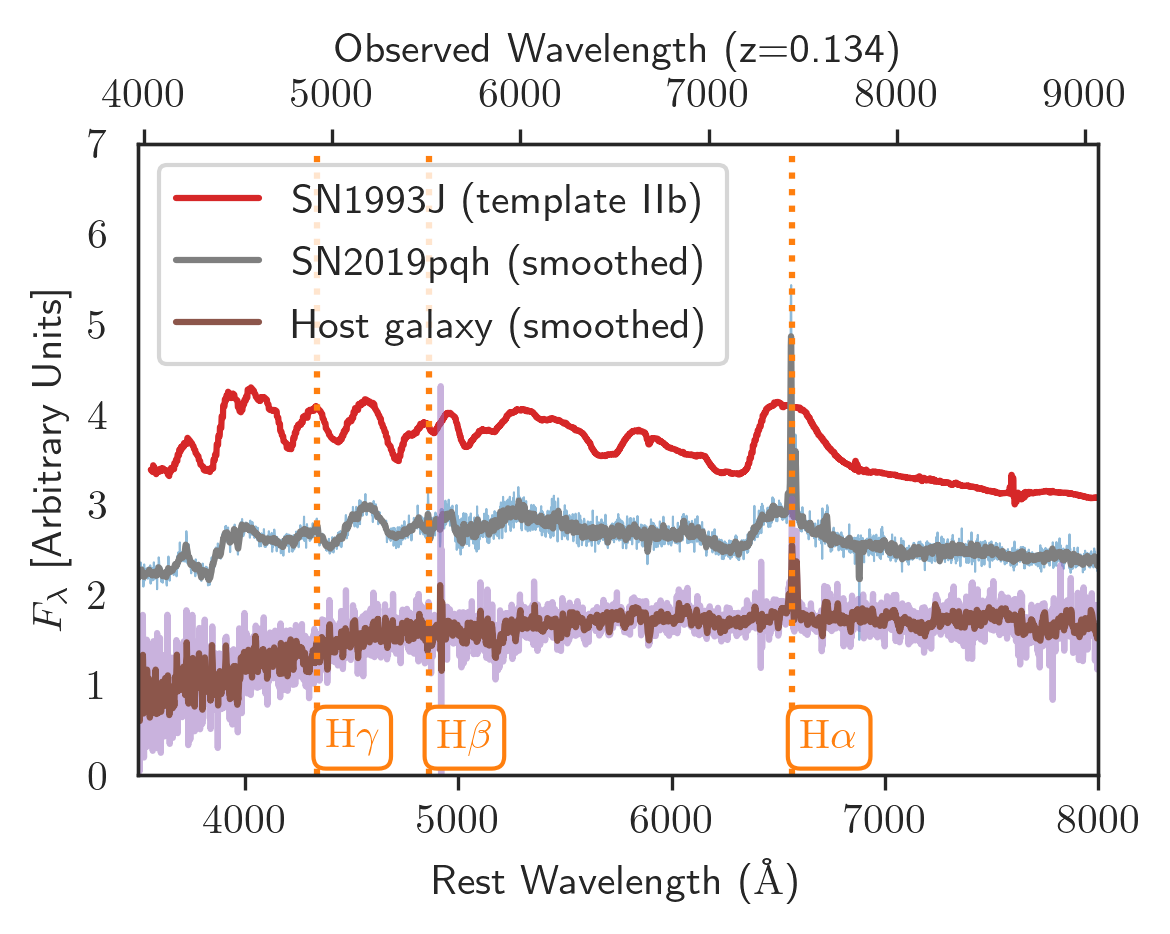

In [12]:
plt.figure(figsize=(base_width, base_height*1.3), dpi=dpi)
# plt.figure(figsize=())
ax1 = plt.subplot(111)
cols = ["C1", "C7", "k", "k"]
# cols = [":", "--", "-.", "-"]

lines = [
    (r"$\rm{H\alpha}$", 6562.8, 0),
    (r"$\rm{H\beta}$", 4861, 0),
    (r"$\rm{H\gamma}$", 4340, 0)
]

plt.plot(comp["wl"]/comp_redshift, comp["flux"]/np.mean(comp["flux"]) + 2.5, color="C3",label="SN1993J (template IIb)")
plt.plot(data["wl"]/redshift, data["flux"]/np.mean(data["flux"]) + 1.5, linewidth=0.5, color="C0", alpha=0.5)
plt.plot(swl/redshift, sf/np.mean(sf) + 1.5, color="C7", label="SN2019pqh (smoothed)")
plt.plot(10.**sdss["loglam"]/redshift, sdss["flux"]/np.mean(sdss["flux"]) + 0.5, color="C4", alpha=0.5)
plt.plot(sswl/redshift, ssf/np.mean(ssf) + 0.5, color="C5", label="Host galaxy (smoothed)")
plt.legend()

# plt.yscale("log")
plt.legend(fontsize=big_fontsize)

for (label, wl, col) in lines:
    plt.axvline(wl, linestyle=":", color=cols[col])
    
    bbox = dict(boxstyle="round", fc="white", ec=cols[col])
    
    plt.annotate(label, (wl + 40., 0.3 + 0.9*col), fontsize=big_fontsize, bbox=bbox, color=cols[col])

plt.ylabel(r"$F_{\lambda}$ [Arbitrary Units]", fontsize=big_fontsize)
ax1b = ax1.twiny()
ax1.set_xlim(left=3500, right=8000)
ax1.set_ylim(bottom=0., top=7.)
rslim = ax1.get_xlim()
ax1b.set_xlim((rslim[0] * redshift, rslim[1] * redshift))
ax1.set_xlabel(r"Rest Wavelength ($\rm \AA$)", fontsize=big_fontsize)
ax1b.set_xlabel(rf"Observed Wavelength (z={redshift-1.:.3f})", fontsize=big_fontsize)
ax1.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax1b.tick_params(axis='both', which='major', labelsize=big_fontsize)
plt.tight_layout()
# sns.despine(right=True, top=False)

filename = "sn2019pqh_spectrum.pdf"

output_path = os.path.join(output_folder, f"{filename}")

plt.savefig(f"plots/{filename}")
plt.savefig(output_path)
plt.show()

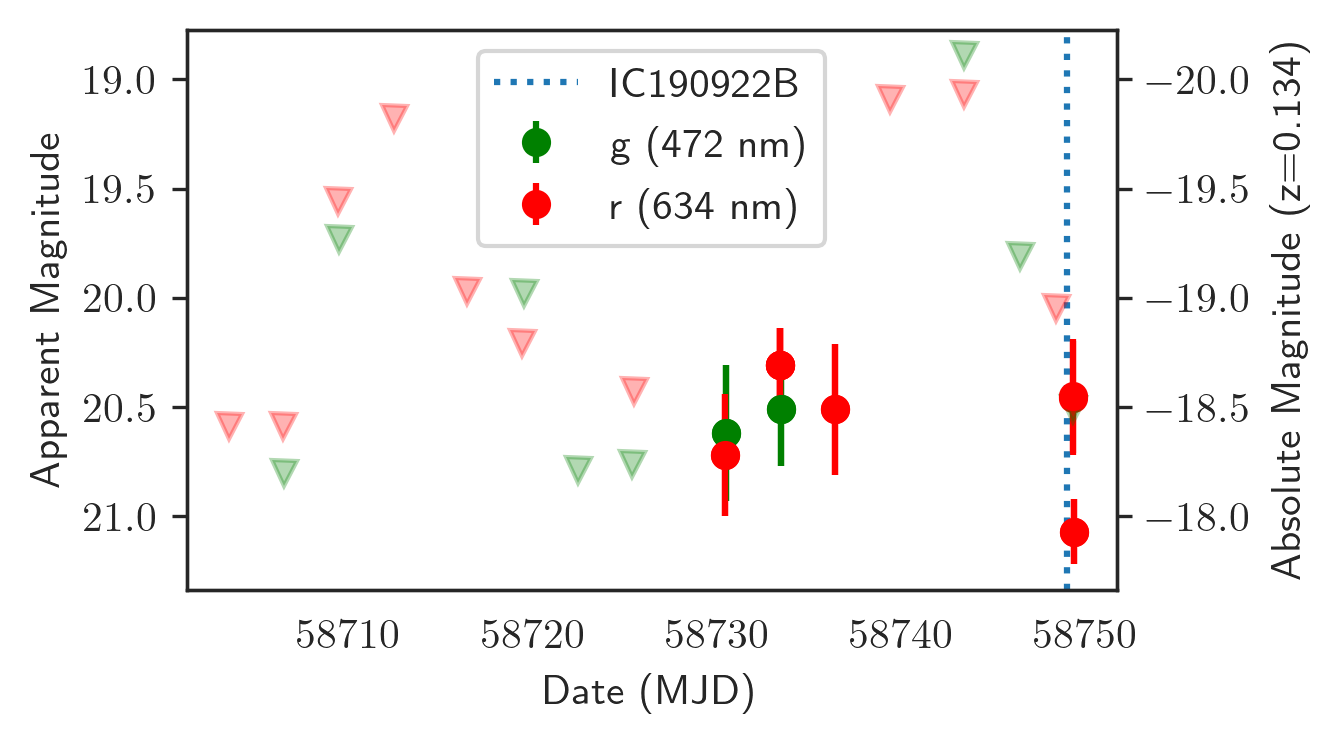

In [13]:
photometry = pd.read_csv("data/ztf19abxtupl.csv", sep=",")

det_mask = photometry["magpsf"] != 99.
obs = photometry[det_mask]
lim = photometry[~det_mask]

plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax = plt.subplot(111)
ax1b = ax.twinx()

cmap = {
    "g": "g",
    "r": "r",
    "i": "orange"
}

wl = {
    "g": 472.27,
    "r": 633.96,
    "i": 788.61,
}

alpha=0.3

for f in ["g", "r", "i"]:
    
    mask = obs["filter"] == f
    
    if np.sum(mask) > 0:
    
        df = obs[mask]
        ax.errorbar(df["jdobs"]-2400000.5, df["magpsf"], color=cmap[f], yerr=df["sigmamagpsf"], marker="o", linestyle=" ", label=f'{f[-1]} ({wl[f]:.0f} nm)')
        ax1b.errorbar(df["jdobs"]-2400000.5, df["absmag"], color=cmap[f], yerr=df["sigmamagpsf"], marker="o", linestyle=" ")

        delta = np.mean(df["magpsf"] - df["absmag"])

        ldf = lim[lim["filter"] == f]
        ax.errorbar(ldf["jdobs"]-2400000.5, ldf["limmag"], color=cmap[f], linestyle=" ", uplims=True, alpha=alpha)
        ax1b.errorbar(ldf["jdobs"]-2400000.5, ldf["limmag"] - delta, color=cmap[f], linestyle=" ", uplims=True, marker="v", alpha=alpha)

ax.invert_yaxis()
ax1b.invert_yaxis()
ax.set_ylabel(r"Apparent Magnitude", fontsize=big_fontsize)
ax1b.set_ylabel(rf"Absolute Magnitude (z={redshift-1.:.3f})", fontsize=big_fontsize)
ax.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax1b.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax.set_xlabel("Date (MJD)", fontsize=big_fontsize)

t_neutrino = Time("2019-09-22T23:03:55.56", format='isot', scale='utc')

ax.axvline(t_neutrino.mjd, linestyle=":", label="IC190922B")

ax.legend(fontsize=big_fontsize)

filename = "sn2019pqh_lightcurve.pdf"

output_path = os.path.join(output_folder, f"{filename}")

plt.savefig(f"plots/{filename}", bbox_inches='tight', pad_inches=0)
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)


# plt.yscale("log")